In [6]:
import scipy.io.wavfile, scipy.signal, sounddevice
import matplotlib.pyplot as plt
import numpy as np
import itertools

plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.dpi"] = 140

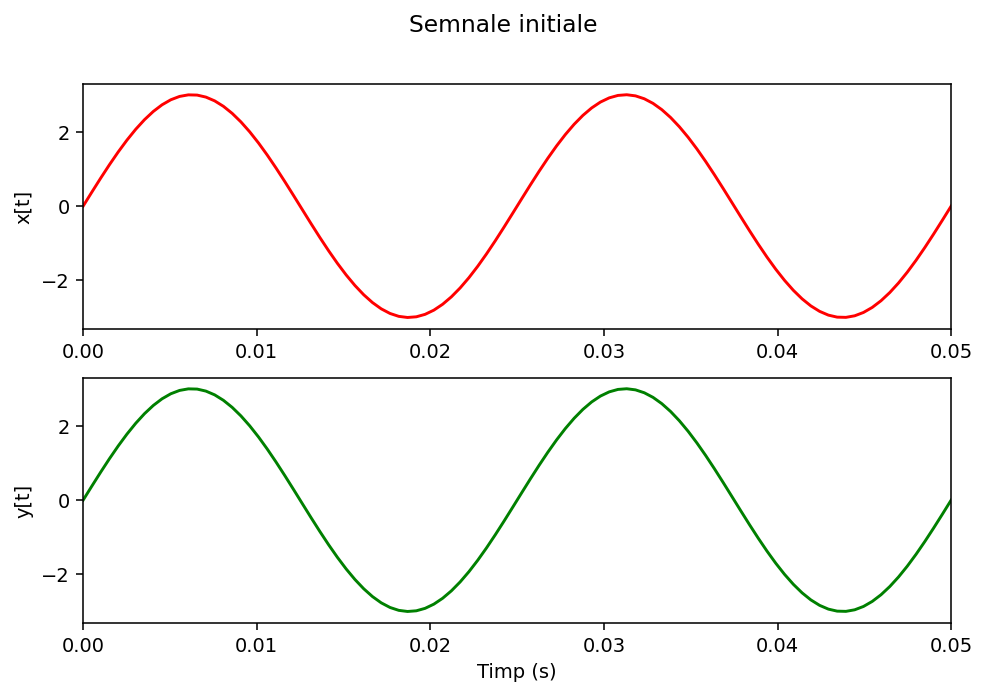

In [7]:
# 1
signal_sin = lambda t: 3 * np.sin(2 * np.pi * 40 * t)
signal_cos = lambda t: 3 * np.cos(2 * np.pi * 40 * t + 3 * np.pi / 2)

dreapta = 0.05
interval = np.linspace(0, dreapta, int(dreapta / 0.0005))
fig, axs = plt.subplots(2)
fig.suptitle("Semnale initiale")
axs[0].plot(interval, signal_sin(interval), color="red")
axs[1].plot(interval, signal_cos(interval), color="green")

axs[0].set_ylabel("x[t]")
axs[1].set_ylabel("y[t]")
axs[1].set_xlabel("Timp (s)")

for ax in axs:
    ax.set_xlim(0, dreapta)

plt.show()

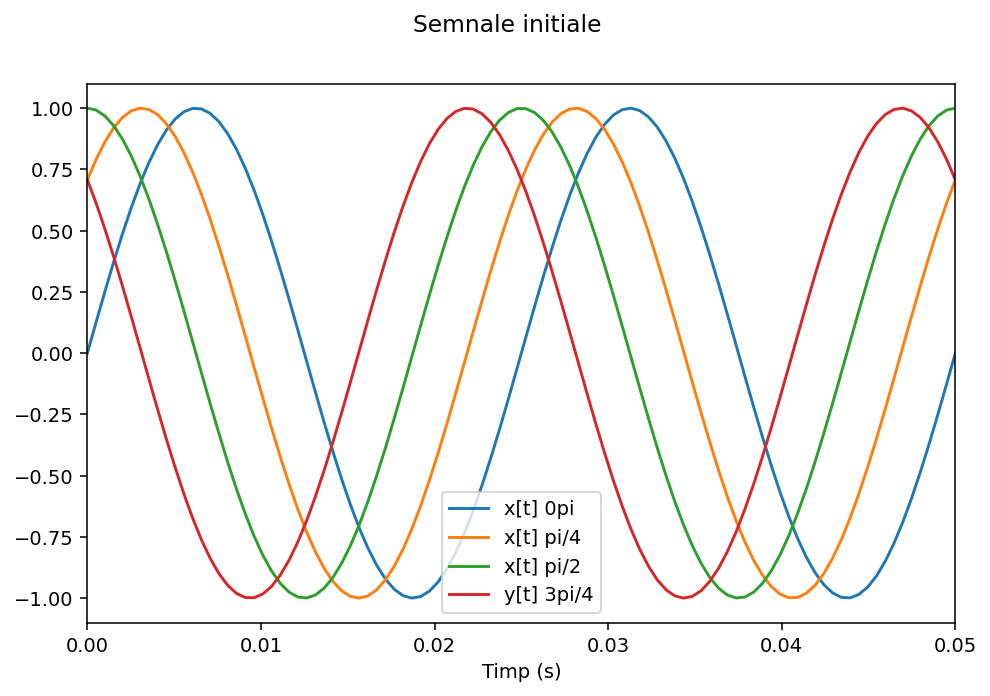

In [8]:
# 2
signal_0 = lambda t: np.sin(2 * np.pi * 40 * t)
signal_1 = lambda t: np.sin(2 * np.pi * 40 * t + np.pi / 4)
signal_2 = lambda t: np.sin(2 * np.pi * 40 * t + np.pi / 2)
signal_3 = lambda t: np.sin(2 * np.pi * 40 * t + 3 * np.pi / 4)
signals = [signal_0, signal_1, signal_2, signal_3]

dreapta = 0.05
interval = np.linspace(0, dreapta, int(dreapta / 0.0005))
fig, ax = plt.subplots()
fig.suptitle("Semnale initiale")
ax.plot(interval, signal_0(interval), label="x[t] 0pi")
ax.plot(interval, signal_1(interval), label="x[t] pi/4")
ax.plot(interval, signal_2(interval), label="x[t] pi/2")
ax.plot(interval, signal_3(interval), label="y[t] 3pi/4")


ax.set_xlabel("Timp (s)")

ax.set_xlim(0, dreapta)
ax.legend()

plt.show()

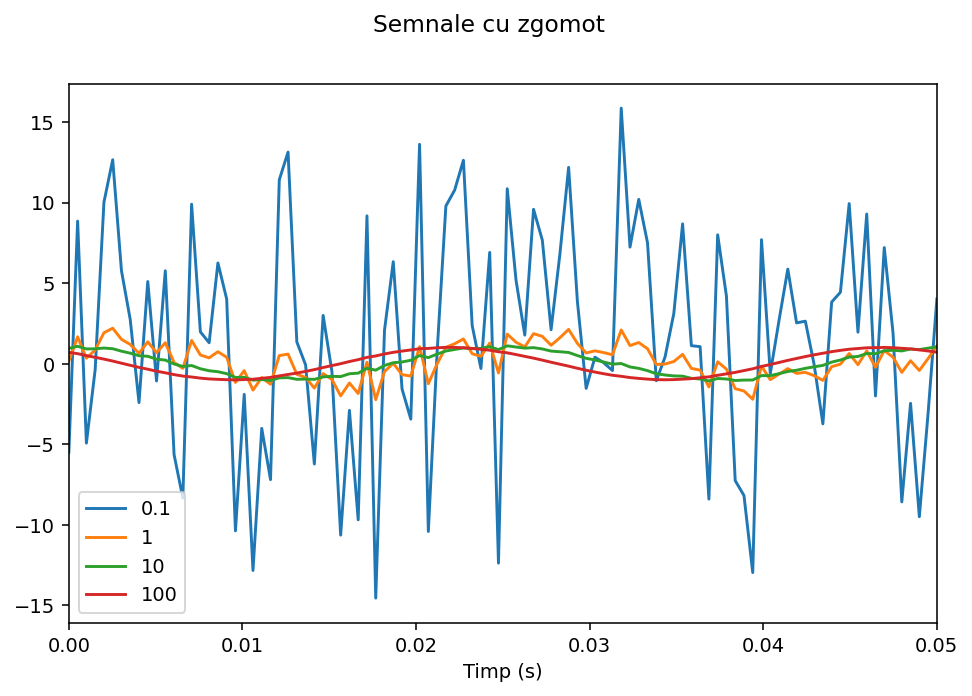

[6.791266229192019, 0.6825479373830814, 0.06859521876152577, 0.006825479373830814]


In [9]:
noise = np.random.normal(0, 1, 100)
snr = [0.1, 1, 10, 100]

gammas = [
    np.linalg.norm(signal(interval)) / (ratio * np.linalg.norm(noise))
    for (ratio, signal) in itertools.zip_longest(snr, signals)
]

fig, ax = plt.subplots()
fig.suptitle("Semnale cu zgomot")
for i, (gamma, signal) in enumerate(itertools.zip_longest(gammas, signals)):
    ax.plot(
        interval,
        signal(interval) + gamma * noise,
        label=snr[i],
    )

ax.set_xlabel("Timp (s)")
ax.set_xlim(0, dreapta)
ax.legend()

plt.show()

print(gammas)

In [10]:
# 3 comentat ca e loud, warning
import time


def play(func):
    sounddevice.play(func, 44100)
    sounddevice.wait()
    time.sleep(1)


# # a
# freq_signal = 400
# samples = 1600
# t = np.linspace(0, 1, 44100)
# play(np.sin(2 * np.pi * freq_signal * t))


# # b
# freq_signal = 800
# duration = 3
# t = np.linspace(0, duration, 44100)
# play(np.sin(2 * np.pi * freq_signal * t))

# # c
# freq_signal = 240
# duration = 1
# t = np.linspace(0, duration, 44100)
# play(freq_signal * t - np.floor(freq_signal * t))


# # d
# freq_signal = 300
# duration = 1
# t = np.linspace(0, duration, 44100)
# play(np.sign(np.sin(2 * np.pi * freq_signal * t)))

# scipy.io.wavfile.write("waaa.wav", 44100, np.sign(np.sin(2 * np.pi * freq_signal * t)))

# rate, x = scipy.io.wavfile.read("waaa.wav")
# sounddevice.play(x, rate)

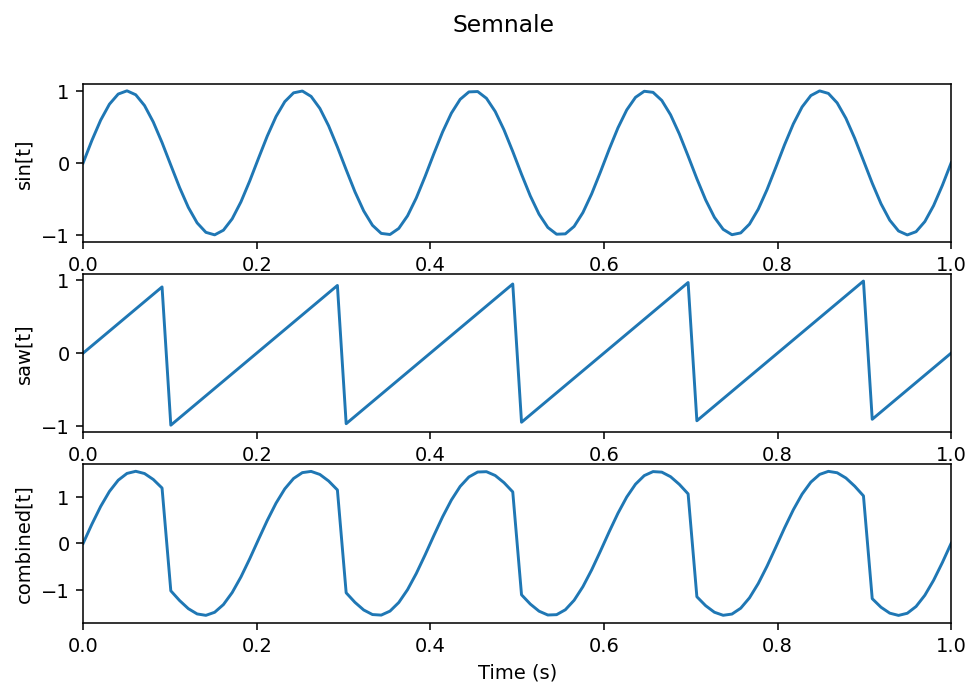

In [11]:
# 4
freq_sample = 100
duration = 1
t = np.linspace(0, duration, duration * freq_sample)
freq_signal = 5

sin_wave = np.sin(2 * np.pi * freq_signal * t)
saw_wave = 2 * (t * freq_signal - np.floor(t * freq_signal + 0.5))

combined_wave = sin_wave + saw_wave
fig, axs = plt.subplots(3)
fig.suptitle("Semnale")

axs[0].plot(t, sin_wave)
axs[1].plot(t, saw_wave)
axs[2].plot(t, combined_wave)

axs[0].set_ylabel("sin[t]")
axs[1].set_ylabel("saw[t]")
axs[2].set_ylabel("combined[t]")
axs[2].set_xlabel("Time (s)")

for ax in axs:
    ax.set_xlim(0, duration)

plt.show()

In [12]:
# 5
t = np.linspace(0, 1, 44100)
sin_wave1 = np.sin(2 * np.pi * 440 * t)
sin_wave2 = np.sin(2 * np.pi * 100 * t)
sin_wave = np.concatenate((sin_wave1, sin_wave2))
play(sin_wave)
# se aud ambele, nu observ nimic special

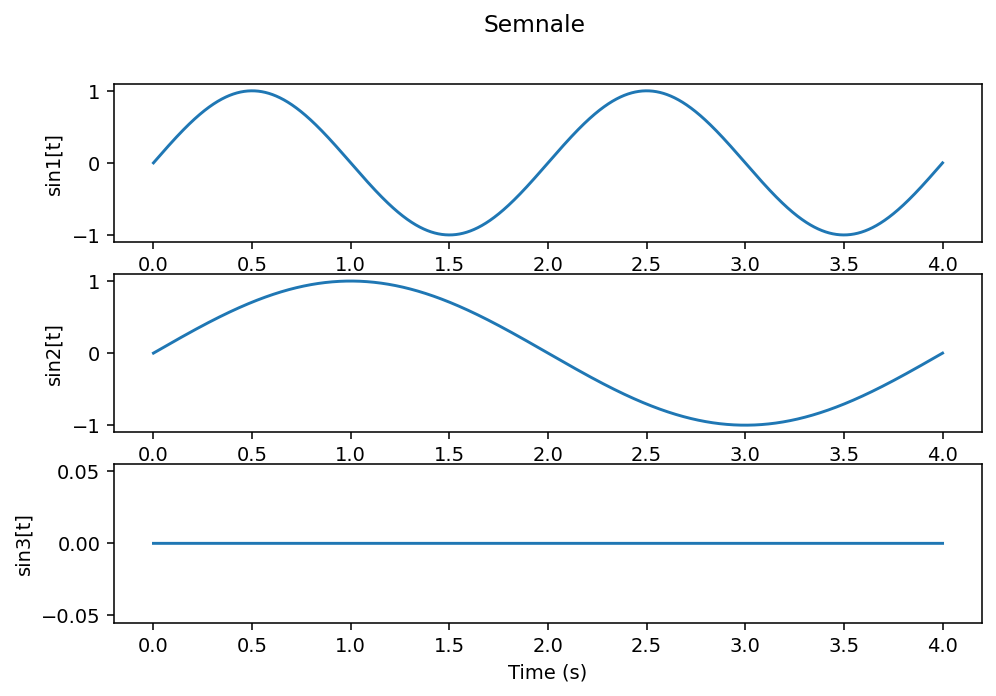

In [13]:
# 6
freq_sample = 4000
t = np.linspace(0, 4, freq_sample)
sin_wave1 = np.sin(2 * np.pi * freq_sample / 2 * t)
sin_wave2 = np.sin(2 * np.pi * freq_sample / 4 * t)
sin_wave3 = np.sin(2 * np.pi * 0 * t)  # asta e efectiv 0

fig, axs = plt.subplots(3)
fig.suptitle("Semnale")

axs[0].plot(t, sin_wave1)
axs[1].plot(t, sin_wave2)
axs[2].plot(t, sin_wave3)

axs[0].set_ylabel("sin1[t]")
axs[1].set_ylabel("sin2[t]")
axs[2].set_ylabel("sin3[t]")
axs[2].set_xlabel("Time (s)")


plt.show()

Text(0.5, 0, 'Time (s)')

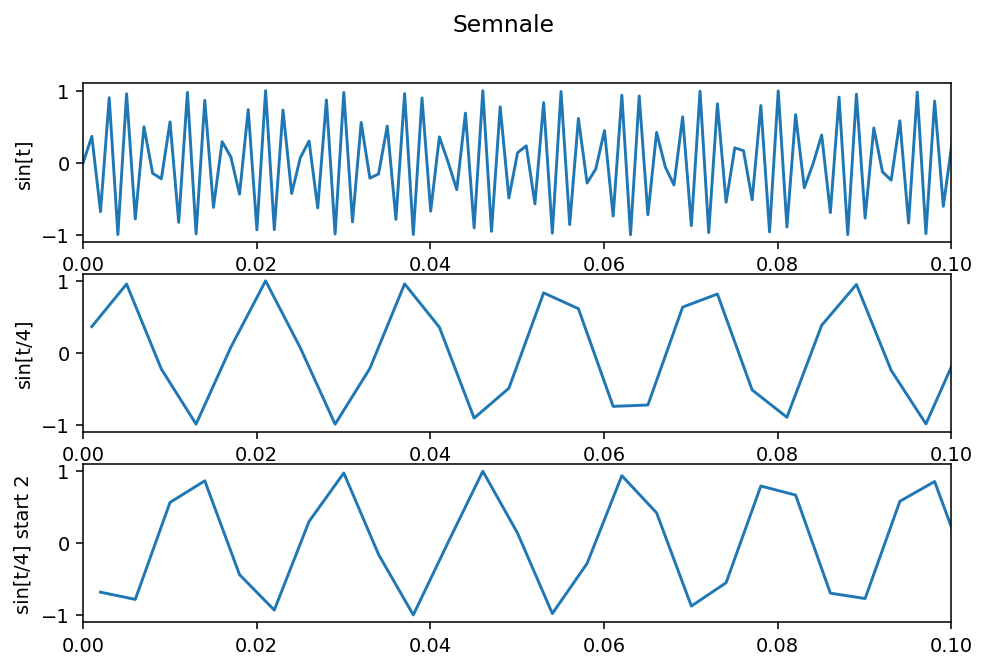

In [20]:
# 7
freq_sample = 1000
t = np.linspace(0, 1, freq_sample)
t_decimated = t[1::4]
sin_wave_initial = np.sin(2 * np.pi * 440 * t)
sin_wave_decimated = np.sin(2 * np.pi * 440 * t_decimated)

t_decimated2 = t[2::4]
sin_wave_decimated2 = np.sin(2 * np.pi * 440 * t_decimated2)

fig, axs = plt.subplots(3)
fig.suptitle("Semnale")

axs[0].plot(t, sin_wave_initial)
axs[1].plot(t_decimated, sin_wave_decimated)
axs[2].plot(t_decimated2, sin_wave_decimated2)

# axs[0].set_xlim(0, 0.1)
# axs[1].set_xlim(0, 0.1)
# axs[2].set_xlim(0, 0.1)

axs[0].set_ylabel("sin[t]")
axs[1].set_ylabel("sin[t/4]")
axs[2].set_ylabel("sin[t/4] start 2")

axs[1].set_xlabel("Time (s)")
# desi sin[t/4] reprezinta tot unda de 440hz reprezentarea grafica a acesteia e mult mai neclara
# sin[t/4] start 2 arata ca sin[t/4] dar shiftat la dreapta

In [15]:
# nu stiu sa citesc 8